## Feature Selection in Machine Learning: Correlation Matrix | Univariate Testing | RFECV

Doc : https://medium.com/geekculture/feature-selection-in-machine-learning-correlation-matrix-univariate-testing-rfecv-1186168fac12

###### What is Feature Selection


Feature Selection is the process used to select the input variables that are most important to your Machine Learning task.


In a Supervised Learning task, your task is to predict an output variable and in some cases, you are limited with a few input variables to work with, but at times, you will have access to a whole lot of set of potential predictors or variables. In this case, it can often be harmful to use all of these input variables or predictors in to your model. This is where feature selection comes in.

###### Why use Feature Selection

- Improve Model Accuracy

- Lower Computational Cost

- Easier to Understand & Explain

### 1- Correlation Template Code

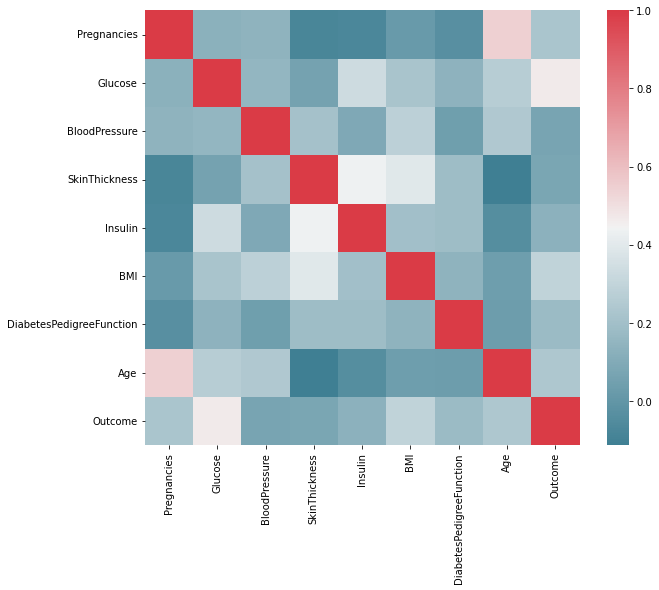

In [1]:
# Importp packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Import dataset 
my_df=pd.read_csv('/Users/admin/Documents/diabetes.csv')
my_df.head()

# run correlation matrix and plot 
f, ax=plt.subplots(figsize=(10,8))
corr=my_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
           cmap=sns.diverging_palette(220, 10, as_cmap=True), 
           square=True, ax=ax)
plt.show()

### 2. Univariate Testing

Univariate Feature Selection or Testing applies statistical tests to find relationships between the output variable and each input variable in isolation. Tests are conducted one input variable at a time. The tests depends whether you are running a regression task or a classification task.

#### A - Regression Task

In a regression task, you may be provided with an f-score and a p-value for each variable and gives you a view of the statistical significance of their relationships between the input and the output variables. This will help you assess how confident you should be with the variables you have used in your model.

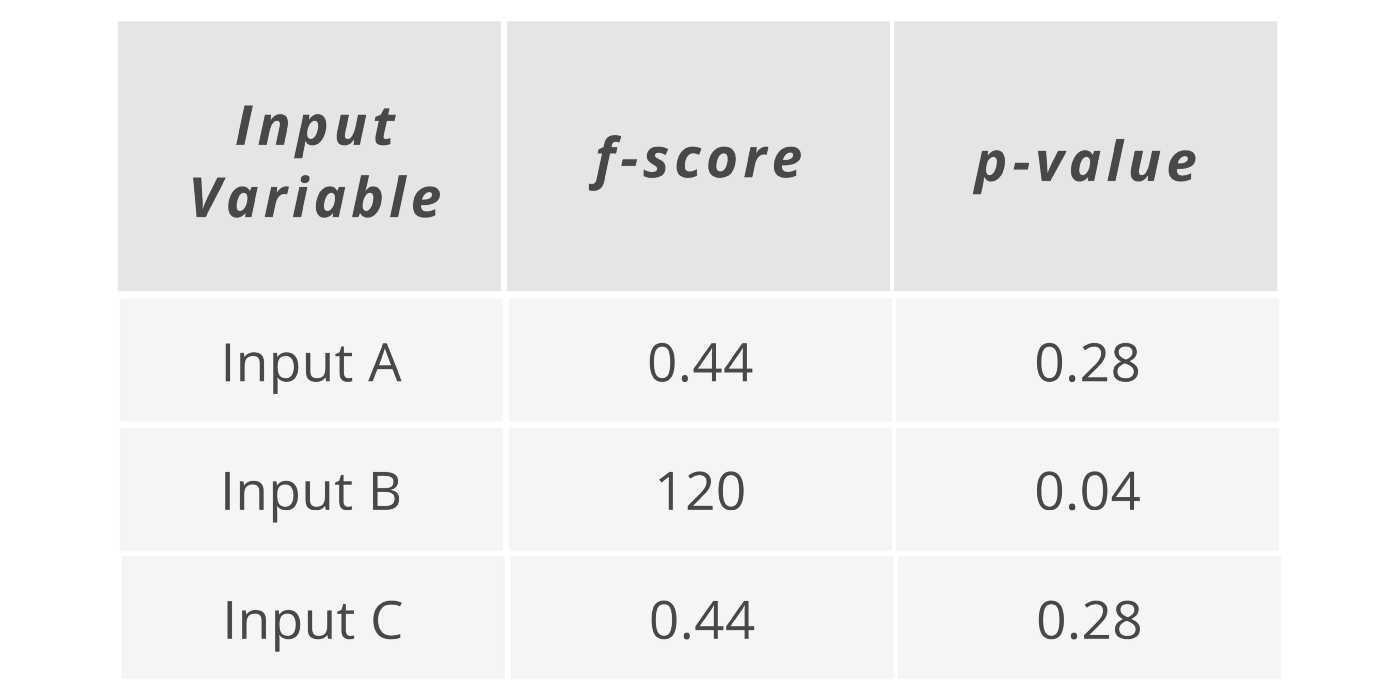

 ***Univariate Testing: Regression Task Code Template***

In [2]:
my_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X_reg=my_df.drop(['DiabetesPedigreeFunction'], axis=1)
y_reg= my_df['DiabetesPedigreeFunction']

In [4]:
X_reg.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
feature_selector=SelectKBest(f_regression, k='all')
fit=feature_selector.fit(X_reg,y_reg)

In [6]:
p_values=pd.DataFrame(fit.pvalues_)
score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X_reg.columns)
summary_stats=pd.concat([input_variable_names, p_values, score], axis=1)
summary_stats.columns=['input_variable','p_value','f_score']
summary_stats.sort_values(by='p_value', inplace=True)

p_values_theshold=0.05
score_threshold=5

selected_variables=summary_stats.loc[(summary_stats['f_score'] >= score_threshold) &
                                    (summary_stats['p_value'] <= p_values_theshold)]

selected_variables=selected_variables['input_variable'].to_list()
X_new=X_reg[selected_variables]

In [7]:
summary_stats

,input_variable,p_value,f_score
4,Insulin,2.402264e-07,27.166959
3,SkinThickness,2.856179e-07,26.820607
7,Outcome,1.254607e-06,23.871300
5,BMI,9.197970e-05,15.458472
1,Glucose,1.345878e-04,14.725684
2,BloodPressure,2.533744e-01,1.306566
6,Age,3.529797e-01,0.863766
0,Pregnancies,3.535346e-01,0.861776


In [8]:
X_new.head()

,Insulin,SkinThickness,Outcome,BMI,Glucose
0,0,35,1,33.6,148
1,0,29,0,26.6,85
2,0,0,1,23.3,183
3,94,23,0,28.1,89
4,168,35,1,43.1,137


##### B - Classification Task

Depending on what test you use, you might be provided a chi-square score and a p-value for each variable. Again, this gives you a view of the statistical significance of their relationships between the input variables and the output variables.

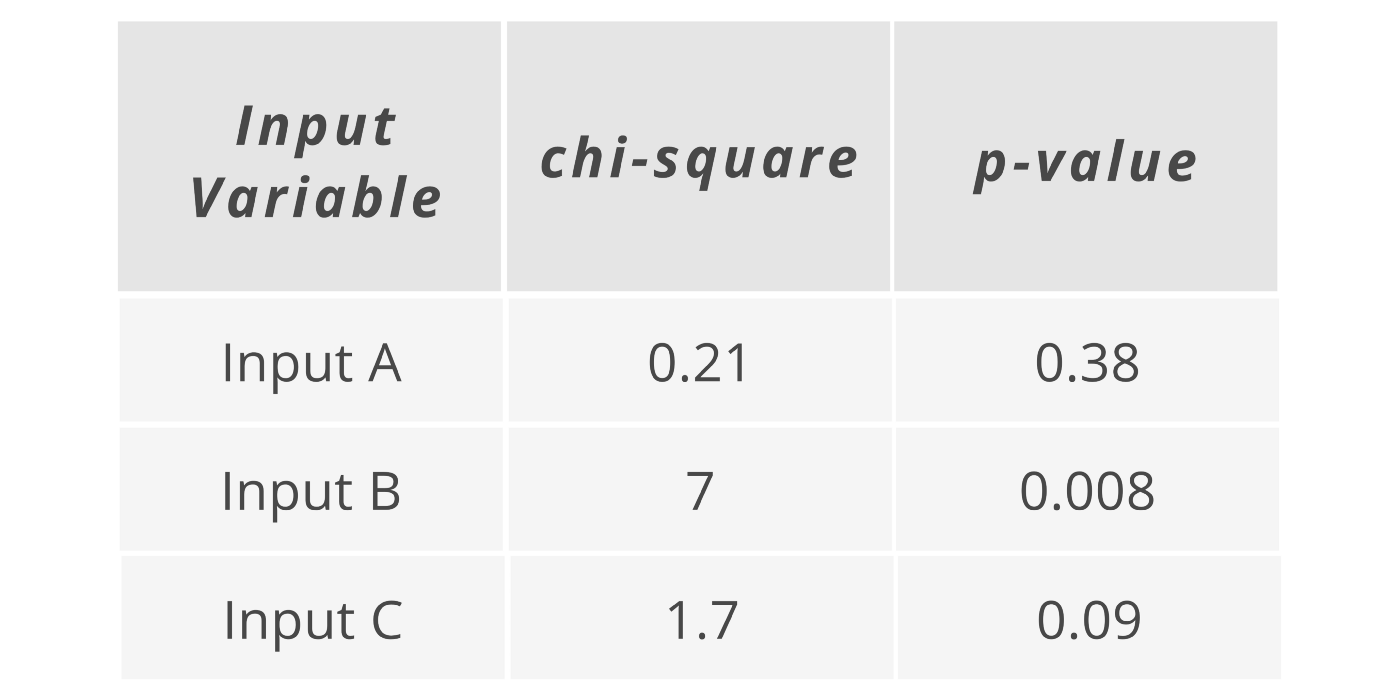

In either Regression or Classification tasks, this will give you a basic information around which variables may be more important than the others and you could also put a threshold for the statistical test scores, the p-value or both to say that you only want to include variables that appear to have a reliable relationship with the output variable that you are looking to predict.

**Univariate Testing: Classification Task Code Template**

In [9]:
my_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
from sklearn.feature_selection import SelectKBest, chi2
X_cl=my_df.drop(['Outcome'], axis=1)
y_cl=my_df['Outcome']

In [11]:
X_cl.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
feature_selector_=SelectKBest(chi2, k='all')
fit=feature_selector_.fit(X_cl, y_cl)

p_values_=pd.DataFrame(fit.pvalues_)
scores_=pd.DataFrame(fit.scores_)
input_variables_names_=pd.DataFrame(X_cl.columns)
summary_stats_=pd.concat([input_variables_names_, p_values, scores_], axis=1)
summary_stats_.columns=['input_variable','p_value_','chi2_score']
summary_stats_.sort_values(by='p_value_', inplace=True)

In [13]:
summary_stats_

,input_variable,p_value_,chi2_score
4,Insulin,2.402264e-07,2175.565273
3,SkinThickness,2.856179e-07,53.108040
7,Age,1.254607e-06,181.303689
5,BMI,9.197970e-05,127.669343
1,Glucose,1.345878e-04,1411.887041
2,BloodPressure,2.533744e-01,17.605373
6,DiabetesPedigreeFunction,3.529797e-01,5.392682
0,Pregnancies,3.535346e-01,111.519691


In [14]:
#put treshold 
p_value_threshold_=0.05
score_threshold_=5

selected_variables_=summary_stats_.loc[(summary_stats_['chi2_score'] >= score_threshold_) &
                                    (summary_stats_['p_value_'] <= p_value_threshold_)]

selected_variables_=selected_variables_['input_variable'].tolist()
X_new_cl=X_cl[selected_variables_]
X_new_cl.head()

,Insulin,SkinThickness,Age,BMI,Glucose
0,0,35,50,33.6,148
1,0,29,31,26.6,85
2,0,0,32,23.3,183
3,94,23,21,28.1,89
4,168,35,33,43.1,137


Note: The only downside of univariate testing is that it only considers variables in isolation. It doesn’t account variables that are interacting with each other.

### 3. Recursive Feature Elimination with Cross-Validation (RFECV)

Recursive Feature Elimination fits a model that starts with all the input variables, then iteratively removes those with the weakest relationship with the output until the desired number of features is reached. It actually fits a model instead of just running statistical tests unlike the Univariate Testing.

“RFE is popular because it is easy to configure and use and because it is effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable.”

The CV in RFECV means Cross-Validation. It gives you a better understanding on what the variables will be included in your model.

In the Cross-Validation part, it splits the data into different chunks and iteratively trains and validates models on each chunks separately. This simply means that each time you assess different models with certain variables included or eliminated, the algorithm also knows how accurate each model was from the model scenarios that are created and can determine which provided the best accuracy and concludes the best set of input variables to use.

***Recursive Feature Elimination with CV Code Template***

In [15]:
my_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
X_reg.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [18]:
regressor_reg=LinearRegression()
feature_selector_reg=RFECV(regressor_reg)
fit_reg=feature_selector_reg.fit(X_reg, y_reg)

In [19]:
optimal_feature_count_reg=feature_selector_reg.n_features_
print(f"Optimal number of features : {optimal_feature_count_reg}")

Optimal number of features : 4


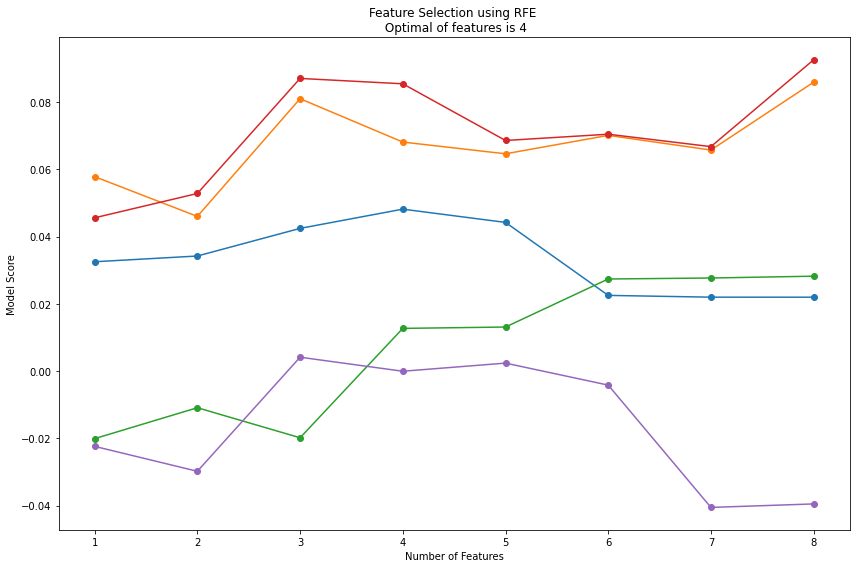

In [22]:
plt.figure(figsize=(12,8))
X_new_reg=X_reg.loc[:,feature_selector_reg.get_support()]
plt.plot(range(1, len(fit_reg.grid_scores_) +1), fit_reg.grid_scores_, 
        marker='o')
plt.ylabel('Model Score')
plt.xlabel('Number of Features')
plt.title(f"Feature Selection using RFE \n Optimal of features is {optimal_feature_count_reg}")
plt.tight_layout()
plt.show()

In [23]:
X_new_reg.head()

,Pregnancies,SkinThickness,Age,Outcome
0,6,35,50,1
1,1,29,31,0
2,8,0,32,1
3,1,23,21,0
4,0,35,33,1
